#  Stochastic Gradient Descent

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 19 10:22:34 2020

@author: Jeff King
"""
#Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime

# Function for Batch gradient Descent

In [2]:
def bgd(samples, y, step_size=0.01, max_iteration_count=10000):
    """
    Batch Gradient Descent
    :param samples 
    :param y: result
    :param step_size: The step size of each successive iteration
    :param max_iteration_count: Maximum number of iterations
    :return:
    """
    sample_num, dimension = samples.shape
    w = np.ones((dimension,1), dtype=np.float32)
    loss_collection = []
    loss = 1
    iteration_count = 0
    # Iteration occurs when loss is greater than the threshold and the number of iterations is less than the maximum number of iterations
    while loss > 0.001 and iteration_count < max_iteration_count:
        loss = 0
        gradient = np.zeros((dimension,1), dtype=np.float32)
        #  Calculate the gradient
        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            for j in range(dimension):
                gradient[j] += (predict_y - y[i]) * samples[i][j]
        #  Update Weights
        for j in range(dimension):
            w[j] -= step_size * gradient[j]
        #  Calculate the current loss value
        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            loss += np.power((predict_y - y[i]), 2)
        #  Store loss in a linked list for picture 
        loss_collection.append(loss)
        iteration_count += 1
    return w,loss_collection

# Function for Stochastic Gradient Descent

In [3]:
def sgd(samples, y, step_size=0.001, max_iteration_count=10000):
    """
    Stochastic Gradient Descent
    :param samples: 
    :param y: 
    :param step_size: 
    :param max_iteration_count: 
    :return:
    """
    sample_num, dimension = samples.shape
    w = np.ones((dimension,1), dtype=np.float32)
    loss_collection = []
    loss = 1
    iteration_count = 0
    while loss > 0.001 and iteration_count < max_iteration_count:
        loss = 0
        gradient = np.zeros((dimension,1), dtype=np.float32)
        #  Unlike BGD, you take a random sample and update the weight
        sample_index = random.randint(0, sample_num-1)
        predict_y = np.dot(w.T, samples[sample_index])
        for j in range(dimension):
            gradient[j] += (predict_y - y[sample_index]) * samples[sample_index][j]
            w[j] -= step_size * gradient[j]

        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            loss += np.power((predict_y - y[i]), 2)

        loss_collection.append(loss)
        iteration_count += 1
    return w,loss_collection

# Main function 

bgd_w: [[2.8636951]
 [4.5708055]]
bgd predict_y: [[12.00530624 28.58141804 18.88928127 20.59639168]]
bgd_time: 0.113706 s
sgd_w: [[2.9145029]
 [4.5240803]]
sgd predict_y: [[11.96266341 28.4494071  19.09659457 20.70617199]]
sgd_time: 0.057833 s


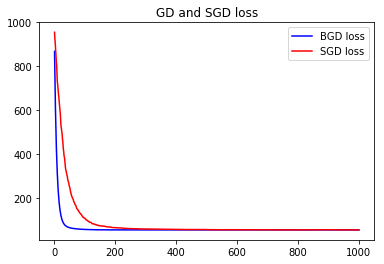

In [4]:
if __name__ == '__main__':
    samples = np.array([[1,2,5,4],
                        [2,5,1,2]]).T
    y = np.array([19,26,19,20]).reshape((4,1))
    #  current time
    time = datetime.datetime.now();
    bgd_w,bgd_loss_collection = bgd(samples, y, 0.001, 1000)
    # The time after BGD
    time_afterBGD = datetime.datetime.now();
    sgd_w,sgd_loss_collection = sgd(samples, y, 0.001, 1000)
    #  After SGD
    time_afterSGD = datetime.datetime.now();
    # Draw loss picture
    epochs = range(1, len(bgd_loss_collection)+1)
    plt.plot(epochs, bgd_loss_collection, 'b', label='BGD loss')
    plt.plot(epochs, sgd_loss_collection, 'r', label='SGD loss')
    plt.title('GD and SGD loss')
    plt.legend()
    plt.savefig('GD and SGD loss.png',dpi = 300)
    #  Print the results
    print('bgd_w:',bgd_w)
    print('bgd predict_y:',np.dot(bgd_w.T, samples.T))
    print('bgd_time:',(time_afterBGD-time).total_seconds(),'s')
    print('sgd_w:',sgd_w)
    print('sgd predict_y:',np.dot(sgd_w.T, samples.T))
    print('sgd_time:',(time_afterSGD-time_afterBGD).total_seconds(),'s')


In [ ]:

NISHITH RANJAN BISWAS    BL0869399
KAIMUZZAMAN   BR0549256
ADITI GHOSH   BM0828576
MUBEEN AFZAL  GS1512621